### GBM

Boosting 알고리즘의 대표적인 모델에는 Gradient Boosting Model이 있다.<br>
모델을 학습 - 예측하면서 오차(residual)를 구할 수 있고<br>
도출된 오차를 기반으로 다시 기존 데이터의 특징을 수정(가중치 재분배)하는 방식으로<br>
학습을 전개한다<br><br>
이때 가중치를 업데이트 하는 방법으로 경사하강법(Gradient Descent)을 이용한다. <br>
즉, 화학에서 농도경사에 따른 물질의 이동과 같이 가중치 업데이트를 농도가(잔차가) 비슷해 질 수록<br>
완만하게 한다는 의미를 갖는다. <br><br>

이때 learning_rate 하이퍼 파라미터의 값이 매우 중요하다. <br>
- 페이퍼에서 추천하는 parameter의 범위는 0.01 ~ 0.004이다.

### Modules

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

### Data load & split & shuffle

In [2]:
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

### Generating model & training & evaluation

In [24]:
#gbm = GradientBoostingClassifier(random_state=0) #default learning_rate = 0.1
gbm = GradientBoostingClassifier(random_state=0,learning_rate=0.3)
gbm.fit(X_train,y_train)

train_score = gbm.score(X_train,y_train)
test_score = gbm.score(X_test,y_test)

print("훈련세트 정확도 :{:.3f}".format(train_score))
print("테스트 세트 정확도 :{:.3f}".format(test_score))
print("#"*30)



훈련세트 정확도 :1.000
테스트 세트 정확도 :0.972
##############################


### Plotting feature importance

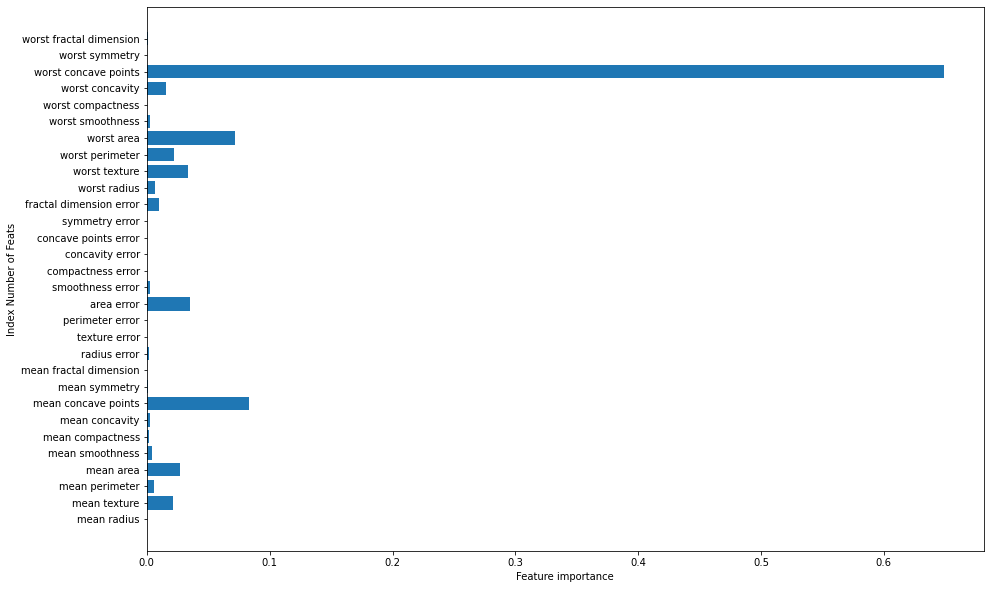

In [25]:
def plot_feature_importances(model):
    n_feature = cancer.data.shape[1]
    plt.figure(figsize=(15,10))
    plt.barh(range(n_feature),model.feature_importances_,align='center') #align
    plt.yticks(np.arange(n_feature),cancer.feature_names) #이름붙이기.
    plt.xlabel("Feature importance")
    plt.ylabel("Index Number of Feats")
plot_feature_importances(gbm)

### GridSearch Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
#boosting 에서 가장 많이 사용하는 하이퍼파라미터들 
#learning_rate, max_depth, n_estimators

param_grid = {
    "n_estimators":[100,150,200,250],
    "max_depth" : [4,6,9,12],
    "learning_rate" : [0.1,0.01,0.001]
}

In [32]:
###적용할 모델을 설계
gmodel = GradientBoostingClassifier()
grid_search = GridSearchCV(gmodel,
                           param_grid=param_grid,
                           n_jobs=-1)

grid_search.fit(X_train,y_train)


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [4, 6, 9, 12],
                         'n_estimators': [100, 150, 200, 250]})

In [30]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=250)

In [45]:
model = GradientBoostingClassifier(random_state=0,learning_rate=0.01,max_depth=4,n_estimators=250)
model.fit(X_train,y_train)
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

print("훈련세트 정확도 :{:.3f}".format(train_score))
print("테스트 세트 정확도 :{:.3f}".format(test_score))
print("#"*30)

훈련세트 정확도 :0.998
테스트 세트 정확도 :0.930
##############################


### Confusion matrix

In [6]:
from sklearn.metrics import classification_report
classification_report(gbm)

TypeError: classification_report() missing 1 required positional argument: 'y_pred'